In [33]:
# import all of the necessary packages for muliple classifiers
# not all of these are necessary for every experiment
import pandas as pd
import numpy as np
import numpy
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ARDRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm.classes import OneClassSVM
from sklearn.neighbors.classification import RadiusNeighborsClassifier
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.linear_model.ridge import RidgeClassifierCV
from sklearn.linear_model.ridge import RidgeClassifier
from sklearn.linear_model.passive_aggressive import PassiveAggressiveClassifier    
from sklearn.gaussian_process.gpc import GaussianProcessClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB  
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.base import ClassifierMixin
from sklearn.utils.testing import all_estimators
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.metrics import confusion_matrix
import xgboost as xgb
# Fixing random state for reproducibility
np.random.seed(19680801)

In [34]:
#specify all the files we want to process in a list

top_genes = ["50_Fly_Genes.csv","50_Human_Genes.csv"] #"Trans_All_Human.csv"
lists_of_data = [top_genes]

In [35]:
#specify a list of all classification models
classifiers_to_test = [
                       xgb.XGBClassifier(),
                       #ExtraTreeClassifier(),
                       #DecisionTreeClassifier(),
                       #RadiusNeighborsClassifier(),
                       #KNeighborsClassifier(),
                       #SGDClassifier(),
                       #RidgeClassifier(),
                       #PassiveAggressiveClassifier(),
                       #GaussianProcessClassifier(),
                       #AdaBoostClassifier(),
                       #GradientBoostingClassifier(),
                       #BaggingClassifier(),
                       #ExtraTreesClassifier(),
                       #RandomForestClassifier(),
                       #LogisticRegression()
                       ]

In [36]:
def perf_measure(y_actual, y_pred):
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1


    return class_id,TP, FP, TN, FN


Reading File: 50_Fly_Genes.csv
50_Fly_Genes.csv using XGBClassifier(objective='multi:softprob')

The average Accuracy was: 0.88

The average true positive was: 24.0

The average false positive was: 3.0

The average true negative  was: 47.0

The average false negative was: 7.0

The total confusion matrix is (actual on rows, predicted on columns):

[[ 6990   347   188]
 [  887  4184   906]
 [    0   940 12558]]


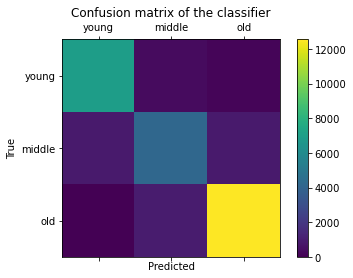


Reading File: 50_Human_Genes.csv
50_Human_Genes.csv using XGBClassifier(objective='multi:softprob')

The average Accuracy was: 0.69

The average true positive was: 20.0

The average false positive was: 9.0

The average true negative  was: 40.0

The average false negative was: 18.0

The total confusion matrix is (actual on rows, predicted on columns):

[[5333 2781  697]
 [2405 5059 1324]
 [ 479 1333 9589]]


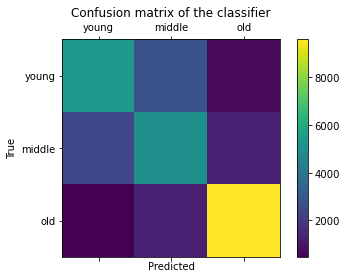

In [37]:
# create individual datasets of each species
for dataset in lists_of_data:
    for file in dataset:
        print("\nReading File: {}".format(file))
        # read file, pull out ages, remove ages&groups
        # read file and transpose (ensuring numerical data)
        df2_test = pd.read_csv(file, header=None).T
        header = df2_test.iloc[0]
        df2_test = df2_test[1:].apply(pd.to_numeric, errors='ignore')
        df2_test.columns = header
        
        # create individual datasets of each species
        # pull out groups for label
        y_strings = df2_test['Group']
        # encode it to integers for use in the classification
        y = y_strings
        
        # drop these columns from the dataframe
        X_ = df2_test.drop(columns=["Age","Group","Sample"])
            
        for classification_model in classifiers_to_test:

            
            model_for_use = classification_model
            
            avg_acc = list()
            f1_list = list()
            avg_tp = list()
            avg_fp = list()
            avg_tn = list()
            avg_fn = list()
            avg_cm = list()
            
            n_iterations = 1000 # was 1000
            for x in range(n_iterations):
                print(x, end="\r")
                X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=x)
                model_for_use.fit(X_train, y_train)
                predicted_ages = model_for_use.predict(X_test)
                avg_acc.append(sklearn.metrics.accuracy_score(y_test, predicted_ages))
                
                # confusion matrices
                labels = ['young','middle','old']
                avg_cm.append(confusion_matrix(y_test,predicted_ages,labels))
                
                # f1 score
                #f1_list.append(sklearn.metrics.f1_score(y_test, predicted_ages, average="macro"))
                
                # average true/false positive/negative
                class_id, tp, fp, tn, fn = perf_measure(list(y_test), list(predicted_ages))
                avg_tp.append(sum(tp))
                avg_fp.append(sum(fp))
                avg_tn.append(sum(tn))
                avg_fn.append(sum(fn))

            print("{} using {}".format(file, classification_model))
            print("\nThe average Accuracy was: {}".format(round(sum(avg_acc)/len(avg_acc), 2)))
            print("\nThe average true positive was: {}".format(round(sum(avg_tp)/len(avg_tp), 0)))
            print("\nThe average false positive was: {}".format(round(sum(avg_fp)/len(avg_fp), 0)))
            print("\nThe average true negative  was: {}".format(round(sum(avg_tn)/len(avg_tn), 0)))
            print("\nThe average false negative was: {}".format(round(sum(avg_fn)/len(avg_fn), 0)))
            
            print("\nThe total confusion matrix is (actual on rows, predicted on columns):\n")
            #print(np.sum(avg_cm, axis=0))
            
            cm = np.sum(avg_cm, axis=0)
            print(cm)
            fig = plt.figure()
            ax = fig.add_subplot(111)
            cax = ax.matshow(cm)
            plt.title('Confusion matrix of the classifier')
            fig.colorbar(cax)
            ax.set_xticklabels([''] + labels)
            ax.set_yticklabels([''] + labels)
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.show()
            